##Bitcoin Price prediction using Facebook Prophet

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing Necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [3]:
import pandas as pd
from prophet import Prophet
import plotly.express as px


In [4]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default= 'colab'

## Importing the Dataset & Exploring it

In [9]:
from google.colab import files
files.upload()

Saving bitcoin_data.csv to bitcoin_data (1).csv


{'bitcoin_data (1).csv': b'Date,Close\r\n1/1/2016,435.66\r\n1/2/2016,435.4\r\n1/3/2016,431.91\r\n1/4/2016,433.85\r\n1/5/2016,433.34\r\n1/6/2016,430.87\r\n1/7/2016,459.07\r\n1/8/2016,454.44\r\n1/9/2016,450.38\r\n1/10/2016,449.99\r\n1/11/2016,449.19\r\n1/12/2016,434.01\r\n1/13/2016,432.77\r\n1/14/2016,430.03\r\n1/15/2016,357.53\r\n1/16/2016,388.7\r\n1/17/2016,378.46\r\n1/18/2016,384.89\r\n1/19/2016,375.27\r\n1/20/2016,418.54\r\n1/21/2016,409.38\r\n1/22/2016,382.9\r\n1/23/2016,387.5\r\n1/24/2016,403.05\r\n1/25/2016,391.4\r\n1/26/2016,391.54\r\n1/27/2016,394.79\r\n1/28/2016,379.61\r\n1/29/2016,378.68\r\n1/30/2016,378.46\r\n1/31/2016,367.95\r\n2/1/2016,371.33\r\n2/2/2016,372.93\r\n2/3/2016,368.87\r\n2/4/2016,387.99\r\n2/5/2016,384.5\r\n2/6/2016,375.44\r\n2/7/2016,377.49\r\n2/8/2016,371.14\r\n2/9/2016,372.68\r\n2/10/2016,378.44\r\n2/11/2016,378.23\r\n2/12/2016,382.05\r\n2/13/2016,391\r\n2/14/2016,406.59\r\n2/15/2016,398.95\r\n2/16/2016,407.42\r\n2/17/2016,415.2\r\n2/18/2016,421.19\r\n2/19/20

In [10]:
#read_csv function from pandas
df= pd.read_csv("bitcoin_data.csv")

In [11]:
df

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1705 non-null   object 
 1   Close   1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [13]:
df.describe()

,Close
count,1705.000000
mean,5455.314499
std,3962.263892
min,357.530000
25%,1062.150000
50%,6005.050000
75%,8624.280000
max,19650.010000


# Data Visualization

In [14]:
# Area graph (Date Vs Price)

In [15]:
px.area(df,x='Date',y='Close')

In [16]:
# Violin plot

In [17]:
px.violin(df, y="Close")

# Creating Facebook Prophet Model

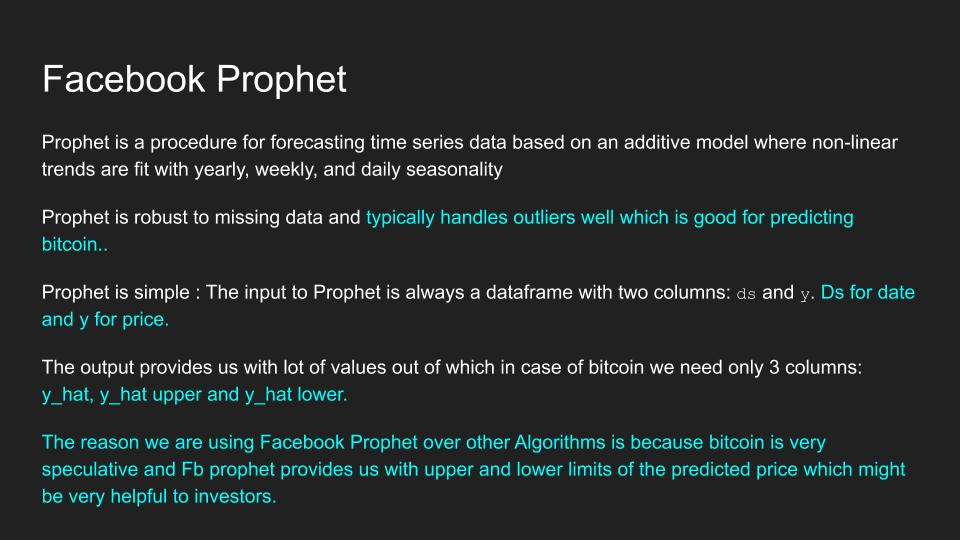

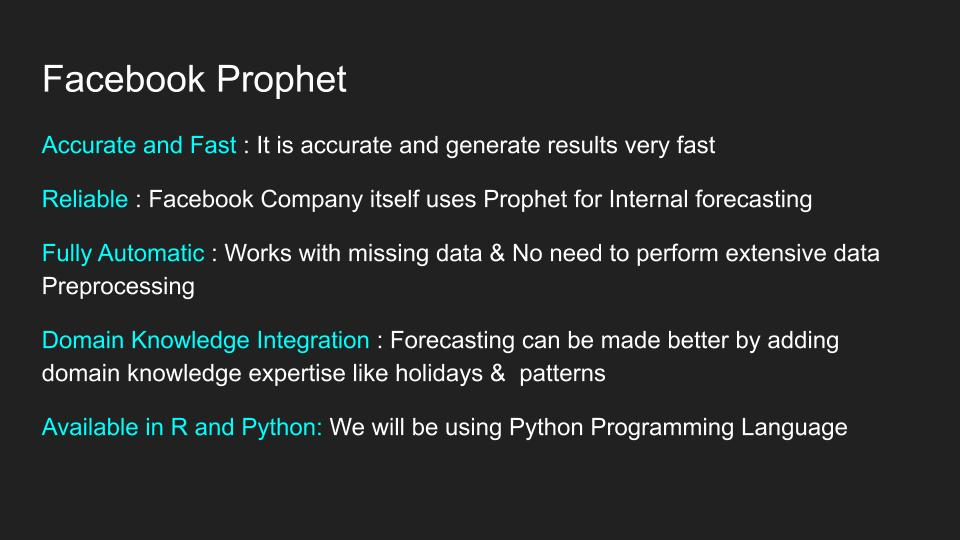

## Data Preperation

In [18]:
df

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


In [19]:
prophet_df = df.rename(columns={'Date':'ds','Close':'y'})

In [20]:
prophet_df

,ds,y
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


## Modelling

In [21]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75e6dkan/zq6z9euc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75e6dkan/ur6zq7hj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30812', 'data', 'file=/tmp/tmp75e6dkan/zq6z9euc.json', 'init=/tmp/tmp75e6dkan/ur6zq7hj.json', 'output', 'file=/tmp/tmp75e6dkan/prophet_modelb_zjcg7d/prophet_model-20250504173026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:30:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:30:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [22]:
future = m.make_future_dataframe(periods=365)
forecast= m.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,1097.229048,-13.257920,2811.719854,1097.229048,1097.229048,252.072989,252.072989,252.072989,-3.414222,-3.414222,-3.414222,255.487210,255.487210,255.487210,0.0,0.0,0.0,1349.302037
1,2016-01-02,1092.799955,-33.509264,2754.528654,1092.799955,1092.799955,234.526332,234.526332,234.526332,15.189991,15.189991,15.189991,219.336341,219.336341,219.336341,0.0,0.0,0.0,1327.326287
2,2016-01-03,1088.370861,-87.373561,2594.306137,1088.370861,1088.370861,176.309857,176.309857,176.309857,-9.008198,-9.008198,-9.008198,185.318056,185.318056,185.318056,0.0,0.0,0.0,1264.680718
3,2016-01-04,1083.941767,-117.657789,2701.616922,1083.941767,1083.941767,172.161024,172.161024,172.161024,18.540795,18.540795,18.540795,153.620229,153.620229,153.620229,0.0,0.0,0.0,1256.102791
4,2016-01-05,1079.512673,-207.232028,2671.520209,1079.512673,1079.512673,120.113360,120.113360,120.113360,-4.189440,-4.189440,-4.189440,124.302800,124.302800,124.302800,0.0,0.0,0.0,1199.626033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,2021-08-27,9239.085529,904.507143,19858.520711,-234.165883,18317.753694,1248.544889,1248.544889,1248.544889,-3.414222,-3.414222,-3.414222,1251.959111,1251.959111,1251.959111,0.0,0.0,0.0,10487.630418
2066,2021-08-28,9239.619342,711.086228,19746.687197,-243.997863,18348.868346,1229.104128,1229.104128,1229.104128,15.189991,15.189991,15.189991,1213.914137,1213.914137,1213.914137,0.0,0.0,0.0,10468.723470
2067,2021-08-29,9240.153155,884.817329,19601.744693,-253.829844,18379.211616,1164.510292,1164.510292,1164.510292,-9.008198,-9.008198,-9.008198,1173.518490,1173.518490,1173.518490,0.0,0.0,0.0,10404.663447
2068,2021-08-30,9240.686968,568.969206,19639.911131,-283.965142,18409.554887,1149.663225,1149.663225,1149.663225,18.540795,18.540795,18.540795,1131.122430,1131.122430,1131.122430,0.0,0.0,0.0,10390.350193


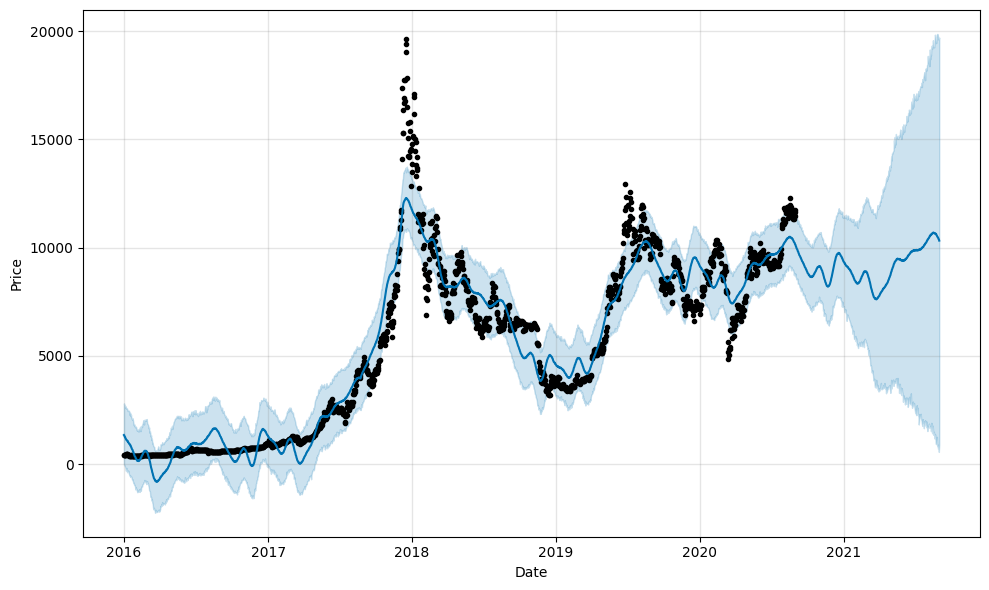

In [24]:
figure =m.plot(forecast,xlabel= 'Date',ylabel='Price')

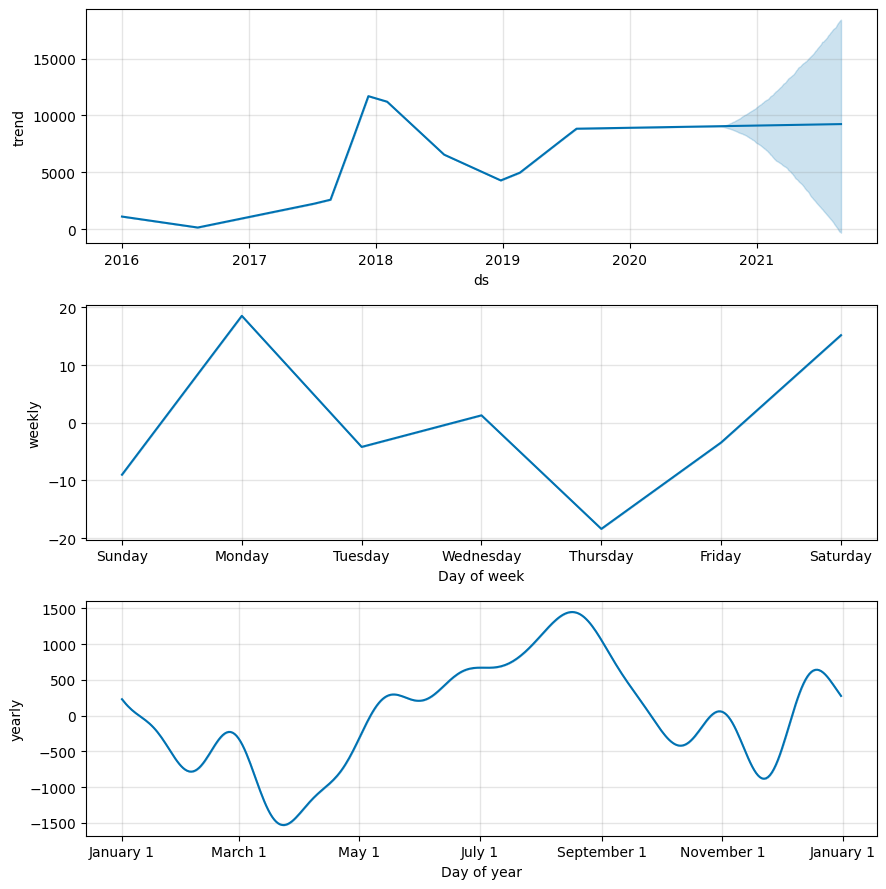

In [25]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [26]:
forecast.to_csv("Forecast.csv")
from google.colab import files
files.download("Forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>